#ML Homework 1 - Rajath Shashikanth Vasisth

#Solution (a)

**The continuous and categorical values are classified in the below code:**

- categorical variables = [ 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status' ]

- Size of continuous variables is 11

- continuous variables = [ 'Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months' ]

- Size of categorical values is 5.

**Coming to analyzing histograms:**

- Except 6th Stage, all categorical varibles are unimodal distributions (Single peak). Some of the unimodal distributions are also left or right skewed.

- 6th Stage is a bimodal distribution (2 peaks)

- Except 'Regional Node Positive' all continuous variables are multimodal distributions (multiple peaks).

- 'Regional Node Positive' is left skewed unimodal distribution (one peak).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
filename = "/content/drive/MyDrive/Datasets/Breast_Cancer.csv"
df = pd.read_csv(filename)
df.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [41]:
df.dtypes

,0
Age,int64
Race,object
Marital Status,object
T Stage,object
N Stage,object
6th Stage,object
differentiate,object
Grade,object
A Stage,object
Tumor Size,int64


In [42]:
categorical = []
continuous = []
for i in df.columns:
  unique = df[i].unique()
  if len(unique) < 10:
    categorical.append(i)
  else:
    continuous.append(i)

print(categorical)
print(continuous)

['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']
['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']


In [43]:
#Change object type to category type for categorical variables
for i in categorical:
  df[i] = df[i].astype('category')

df.dtypes

,0
Age,int64
Race,category
Marital Status,category
T Stage,category
N Stage,category
6th Stage,category
differentiate,category
Grade,category
A Stage,category
Tumor Size,int64


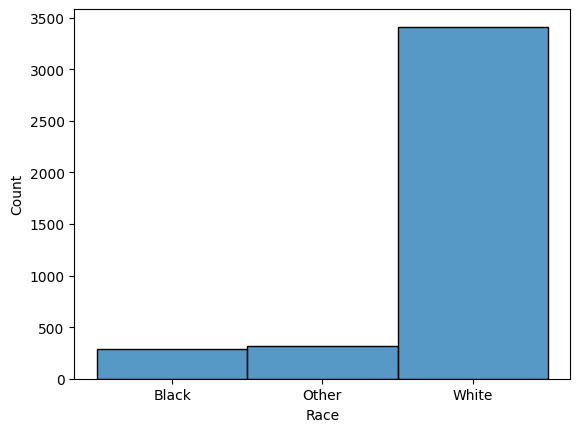

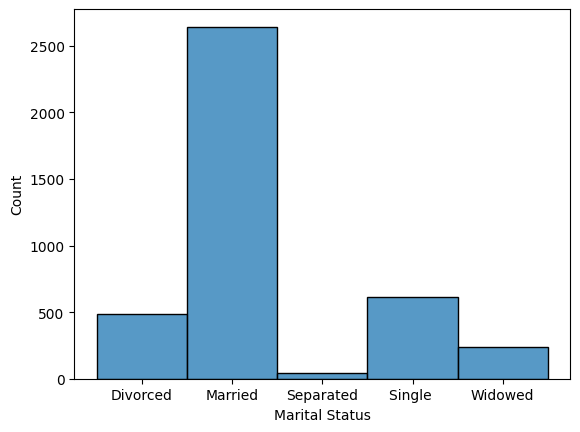

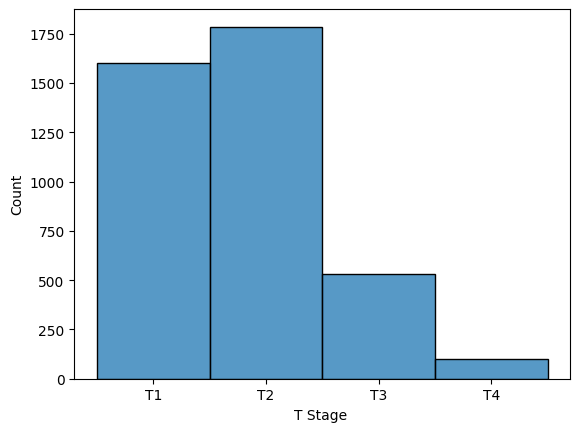

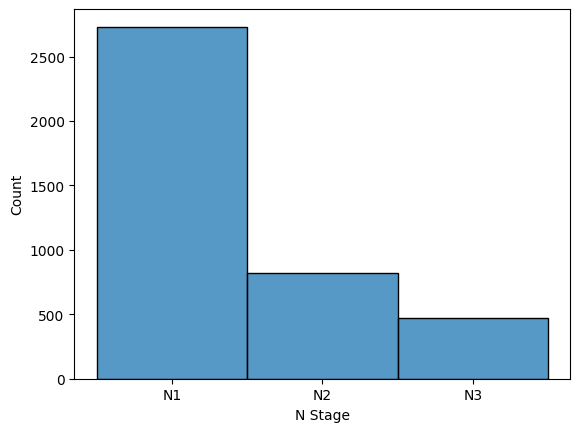

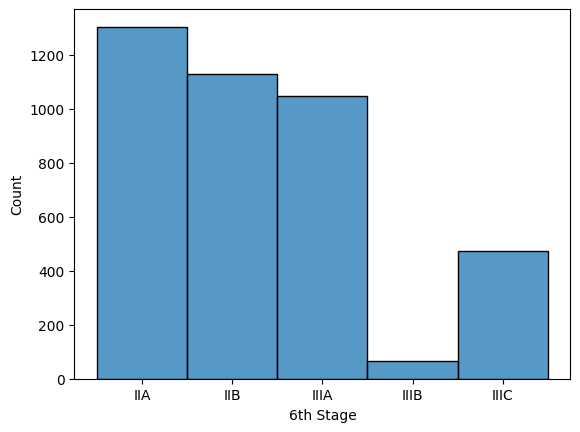

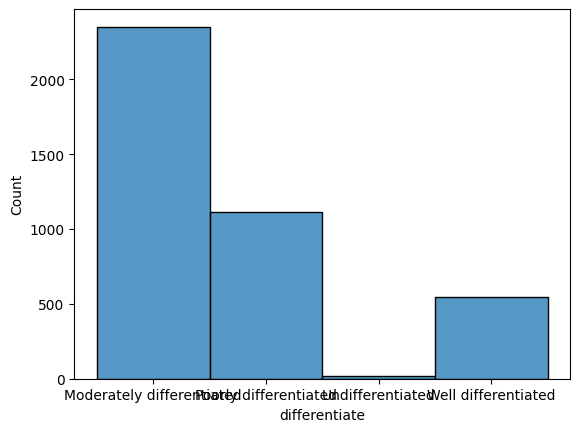

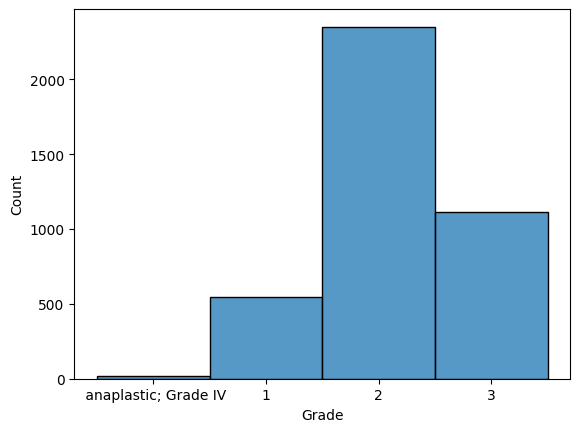

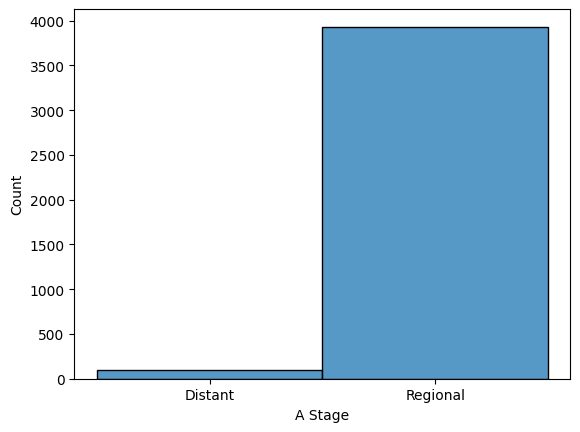

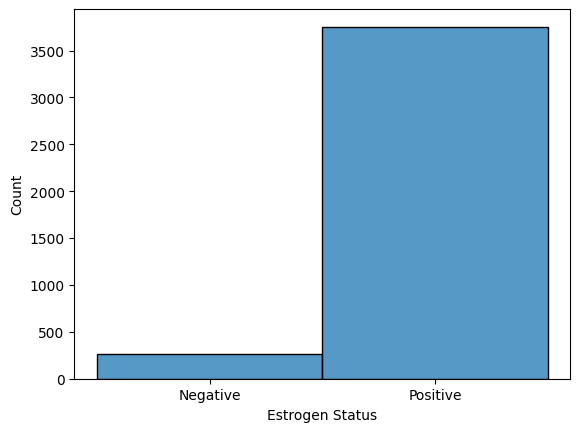

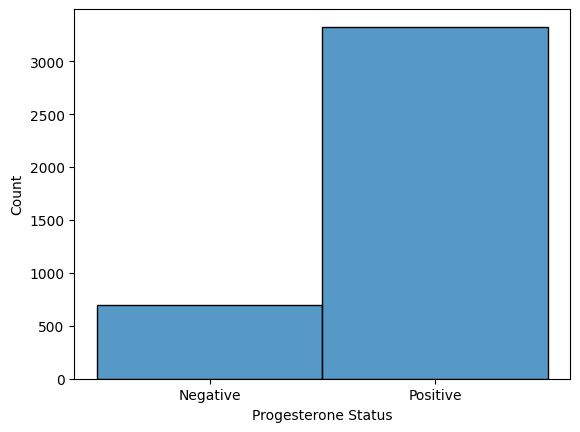

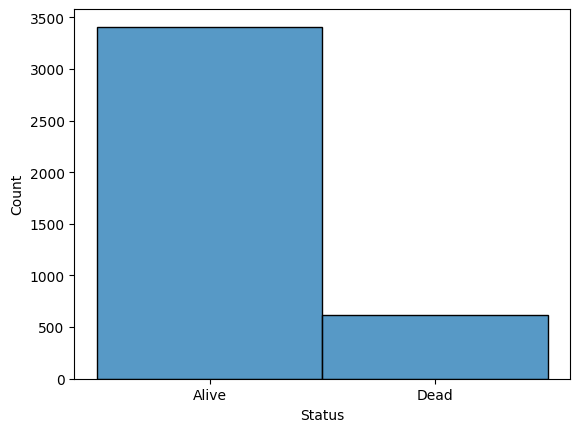

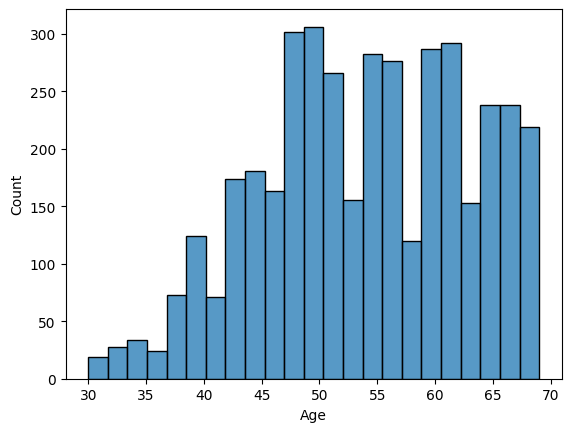

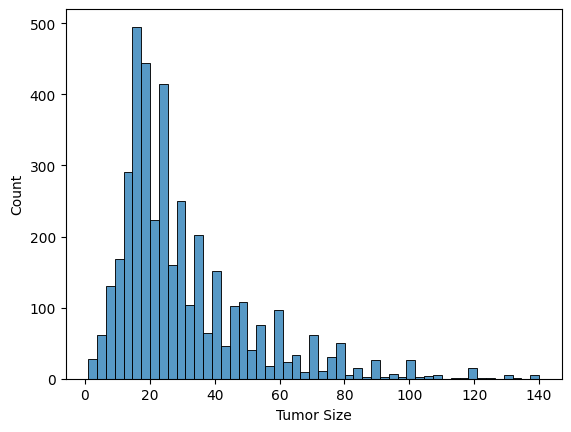

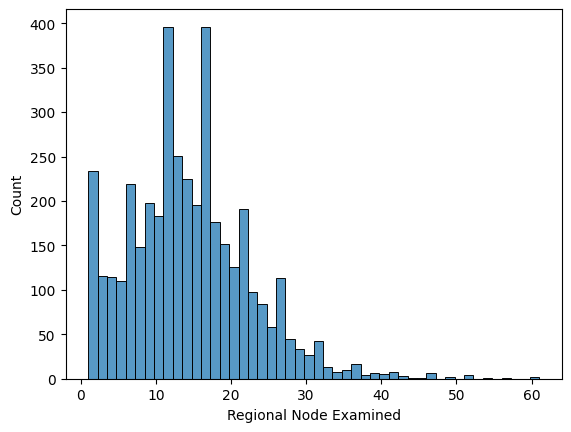

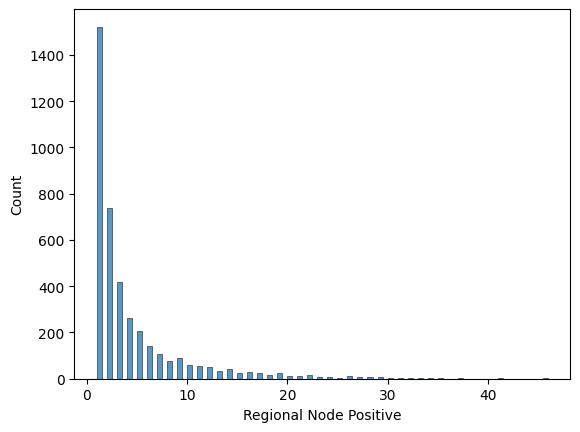

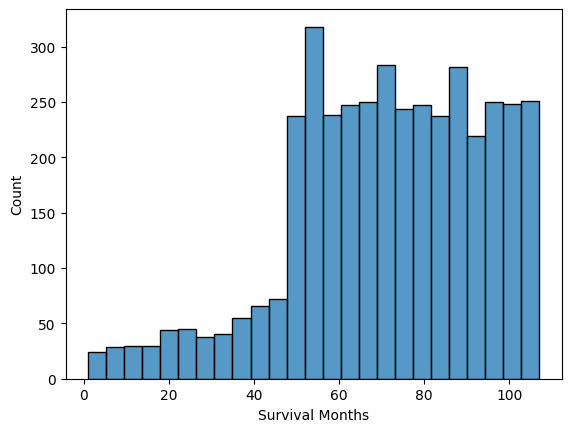

In [44]:
for i in categorical:
  sns.histplot(data=df, x=i)
  plt.show()

for i in continuous:
  sns.histplot(data=df, x=i)
  plt.show()

#Solution(b)

Below shows the scatter plots and pearson correlation calculated for continuous varibales vs survival months

- For age for age > 40 and survival months > 40 points are uniformly distributed. Which implies after age 40, survival months doesn't really depend on age ( We see the same pattern for each age grounp > 40)

- For tumor size for tumor size < 60 and survival months in [20, 100] points are clustered showing more survival if tumor size is less.

- Same as above point applies for Regional Node Examined < 30.

- Same as above applies for Regional Node Positive < 15.

In general the data for extreme cases are low (Very large tumour size or regional node data) and can affect classification of extreme cases

**For Pearson's correlation:**

- There is no linear relationship between the variables in consideration ( A very weak negative relationship)

- Regional Node Postive is nesarest to showing some king of negative linear relationship.



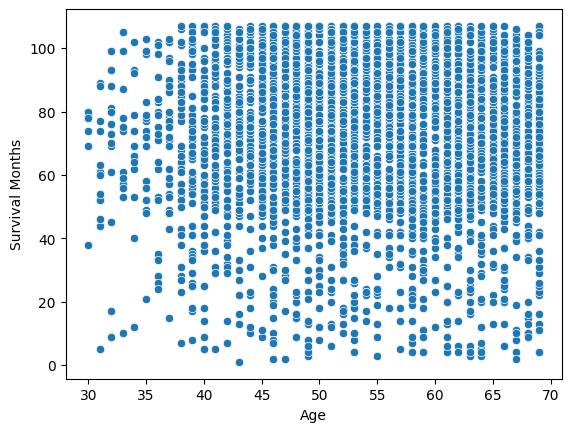

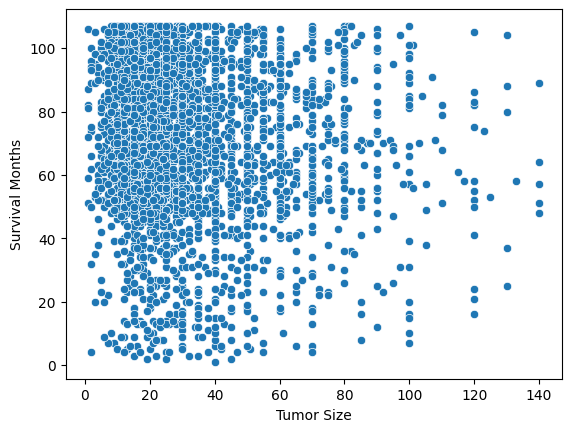

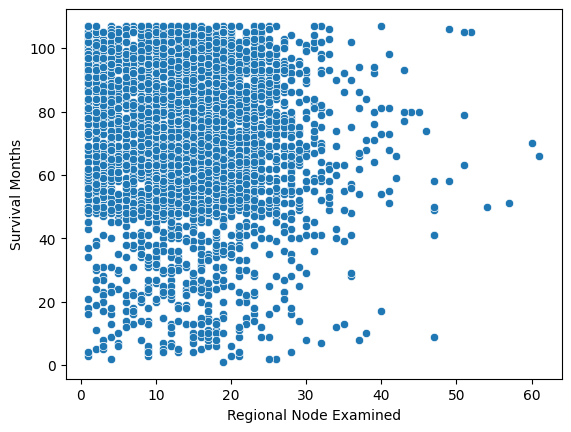

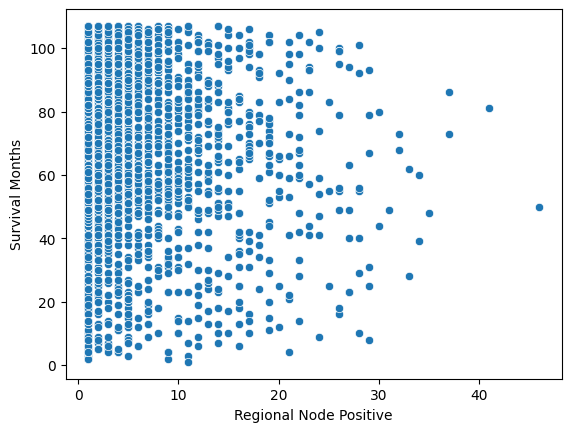

In [45]:
for i in continuous:
  if i == "Survival Months":
    continue
  sns.scatterplot(data=df, x=i, y="Survival Months")
  plt.show()

In [46]:
for i in continuous:
  if i == "Survival Months":
    continue
  corr = np.cov(df[i], df["Survival Months"])[0][1] / (np.std(df[i]) * np.std(df["Survival Months"]))
  print(f"Pearson correlation between {i} and Survival Months: {corr}")

Pearson correlation between Age and Survival Months: -0.009391893890487875
Pearson correlation between Tumor Size and Survival Months: -0.08692284049323254
Pearson correlation between Regional Node Examined and Survival Months: -0.02205969408020117
Pearson correlation between Regional Node Positive and Survival Months: -0.13524745882775993


#Solution(c)

Below shows grouped bar charts for each categorical feature and the ‘Status’ outcome

This is useful to see how data is distributed for different cases of categorical values. Can be helpful to rule out any bias in future classification decisions.

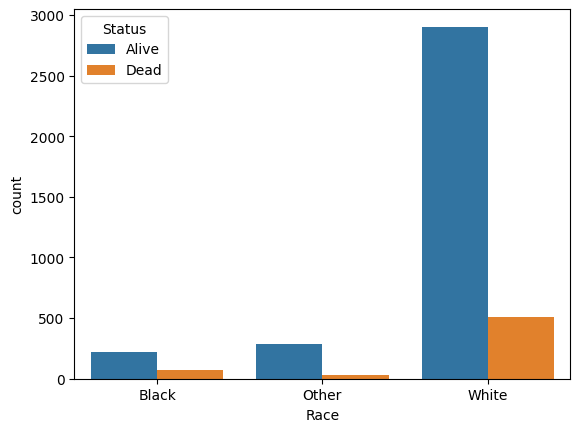

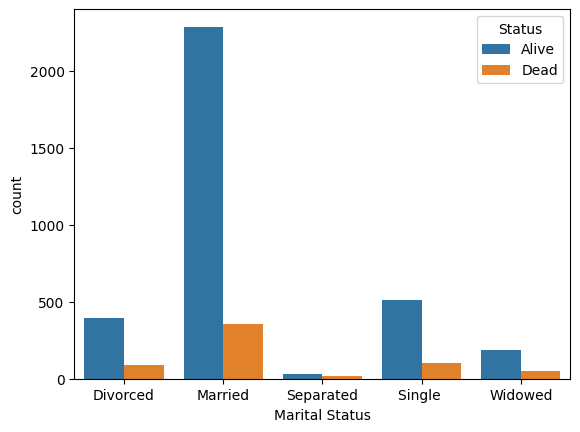

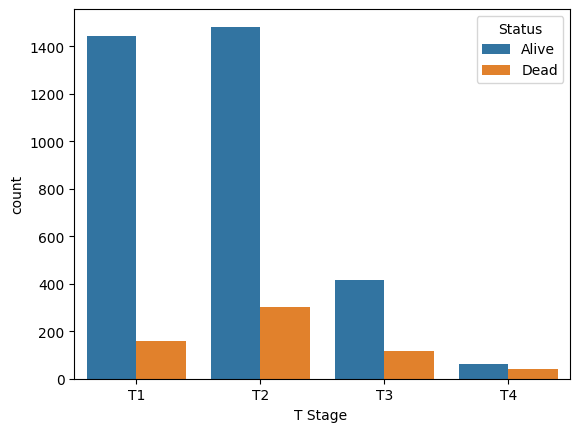

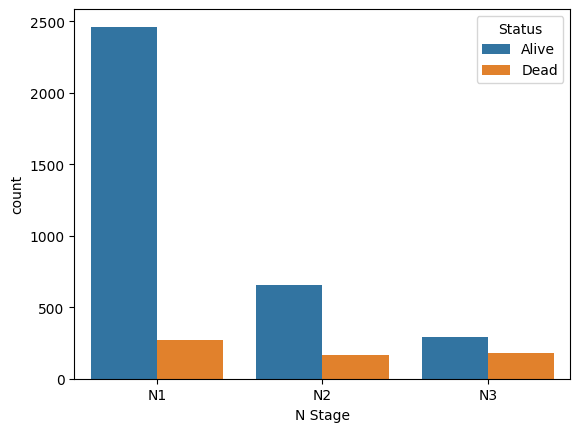

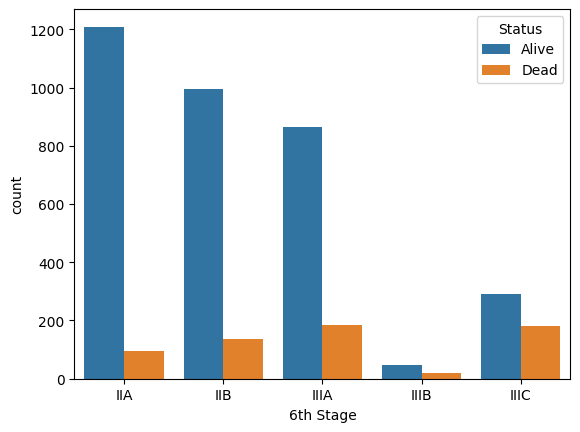

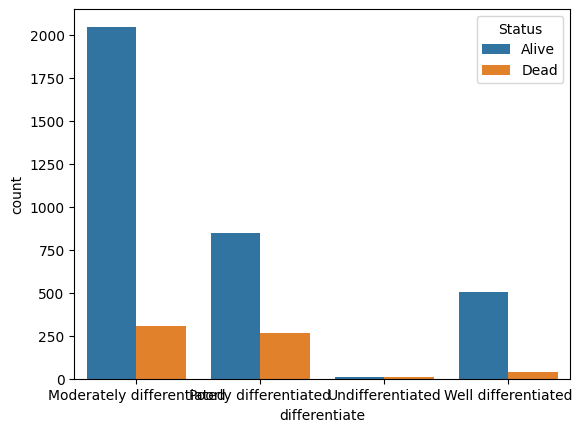

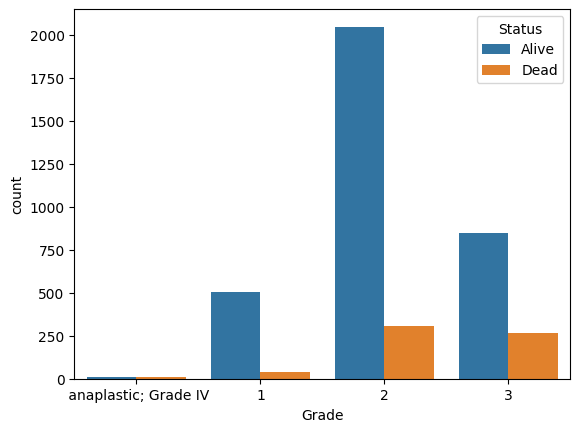

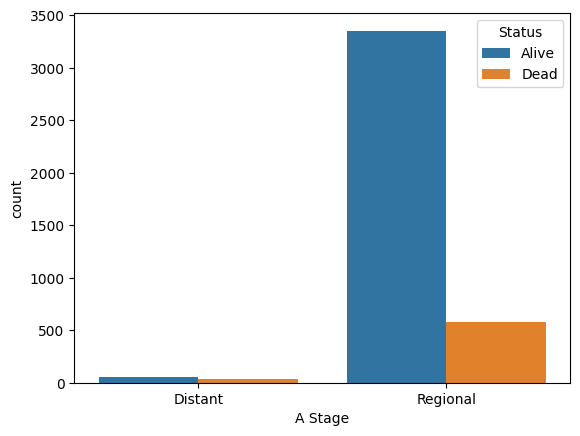

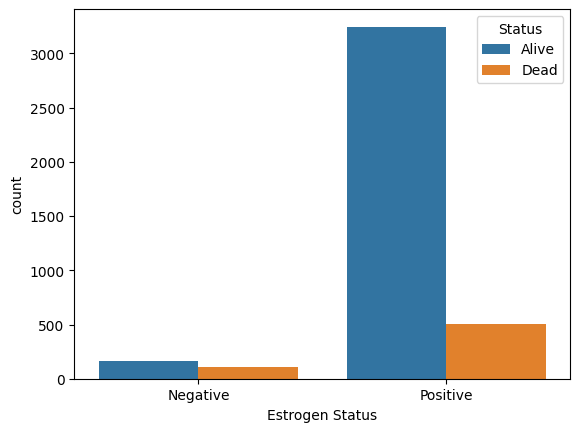

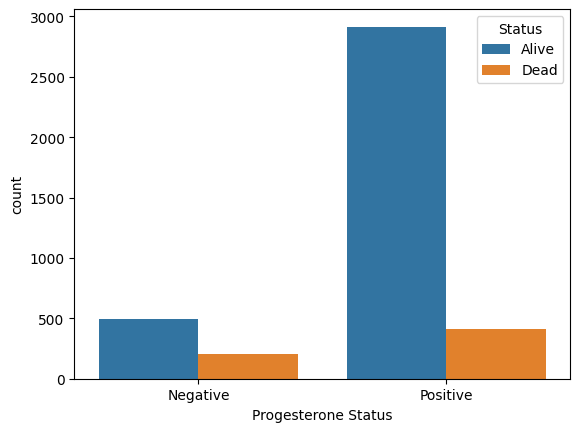

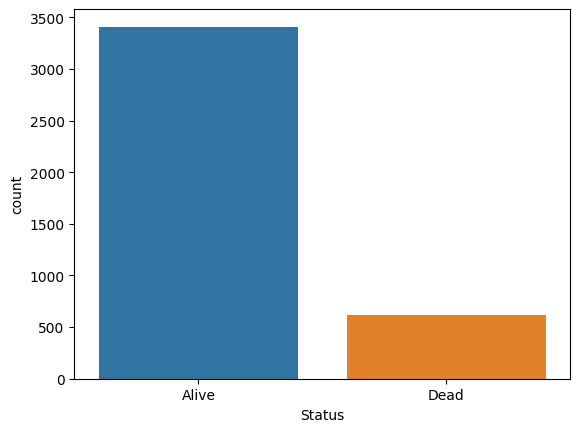

In [47]:
for i in categorical:
  sns.countplot(data=df, x=i, hue="Status")
  plt.show()

#Solution(d)

Below is the code for KNN classification fitted on the dataset.

In [48]:
# Implement the train, dev, and test split
train_df = df.sample(frac=0.7, random_state=30) #70%
remaining_df = df.drop(train_df.index)
dev_df = remaining_df.sample(frac=0.5, random_state=30) #15%
test_df = remaining_df.drop(dev_df.index) #15%

In [63]:
# Separate features and labels
def separate_features_labels(df):
    X = df.drop(columns=['Status'])
    y = df['Status'].map({'Alive': 0, 'Dead': 1})
    return X, y

X_train, y_train = separate_features_labels(train_df)
X_dev, y_dev = separate_features_labels(dev_df)
X_test, y_test = separate_features_labels(test_df)

In [37]:
# Define optimized Euclidean distance using numpy
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Define Hamming distance for categorical variables
def hamming_distance(x1, x2):
    return np.sum(x1 != x2)

#KNN Classifier
def knn_classifier(X_train, y_train, X_test, k, categorical_cols, continuous_cols):
    y_pred = []

    #using np
    X_train = X_train.values
    X_test = X_test.values

    for test_instance in X_test:
        distances = []

        # Vectorized continuous and categorical distance calculation
        for train_instance, train_label in zip(X_train, y_train):

            euclidean_dist = euclidean_distance(test_instance[continuous_cols], train_instance[continuous_cols])

            hamming_dist = hamming_distance(test_instance[categorical_cols], train_instance[categorical_cols])

            # Combine distances
            total_distance = euclidean_dist + hamming_dist
            distances.append((total_distance, train_label))

        # Sort and pick top-k neighbors
        neighbors = sorted(distances, key=lambda x: x[0])[:k]
        neighbor_labels = [label for _, label in neighbors]

        # Predict the majority label
        pred_label = max(set(neighbor_labels), key=neighbor_labels.count)
        y_pred.append(pred_label)

    return np.array(y_pred)

In [52]:
# Identify categorical and continuous columns
categorical_cols = [i for i, col in enumerate(X_train.columns) if col in categorical]
continuous_cols = [i for i, col in enumerate(X_train.columns) if col not in categorical]

# Hyperparameter tuning
k_values = [1, 3, 5, 7, 9, 11]
best_accuracy = 0
best_k_accuracy = None
best_bacc = 0
best_k_bacc = None
best_f1 = 0
best_k_f1 = None

for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_dev, k, categorical_cols, continuous_cols)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_dev) #(true_positive+true_negative)/Total

    # Calculate confusion matrix components
    true_positive = np.sum((y_pred == 1) & (y_dev == 1))
    true_negative = np.sum((y_pred == 0) & (y_dev == 0))
    false_positive = np.sum((y_pred == 1) & (y_dev == 0))
    false_negative = np.sum((y_pred == 0) & (y_dev == 1))

    # Balanced Accuracy (BAcc)
    sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
    bacc = (sensitivity + specificity) / 2

    # F1 Score
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Keep track of the best values for each metric
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k_accuracy = k

    if bacc > best_bacc:
        best_bacc = bacc
        best_k_bacc = k

    if f1 > best_f1:
        best_f1 = f1
        best_k_f1 = k

    print(f"K = {k}: Accuracy = {accuracy:.4f}, Balanced Accuracy = {bacc:.4f}, F1-score = {f1:.4f}")

print(f"\nBest K for Accuracy: {best_k_accuracy}")
print(f"Best K for Balanced Accuracy: {best_k_bacc}")
print(f"Best K for F1-score: {best_k_f1}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Balanced Accuracy: {best_bacc:.4f}")
print(f"Best F1-score: {best_f1:.4f}")

K = 1: Accuracy = 0.8493, Balanced Accuracy = 0.6947, F1-score = 0.5027
K = 3: Accuracy = 0.8825, Balanced Accuracy = 0.7145, F1-score = 0.5644
K = 5: Accuracy = 0.8841, Balanced Accuracy = 0.7114, F1-score = 0.5625
K = 7: Accuracy = 0.8825, Balanced Accuracy = 0.6983, F1-score = 0.5419
K = 9: Accuracy = 0.8907, Balanced Accuracy = 0.7073, F1-score = 0.5658
K = 11: Accuracy = 0.8924, Balanced Accuracy = 0.7123, F1-score = 0.5752

Best K for Accuracy: 11
Best K for Balanced Accuracy: 3
Best K for F1-score: 11
Best Accuracy: 0.8924
Best Balanced Accuracy: 0.7145
Best F1-score: 0.5752


Text(0, 0.5, 'Score')

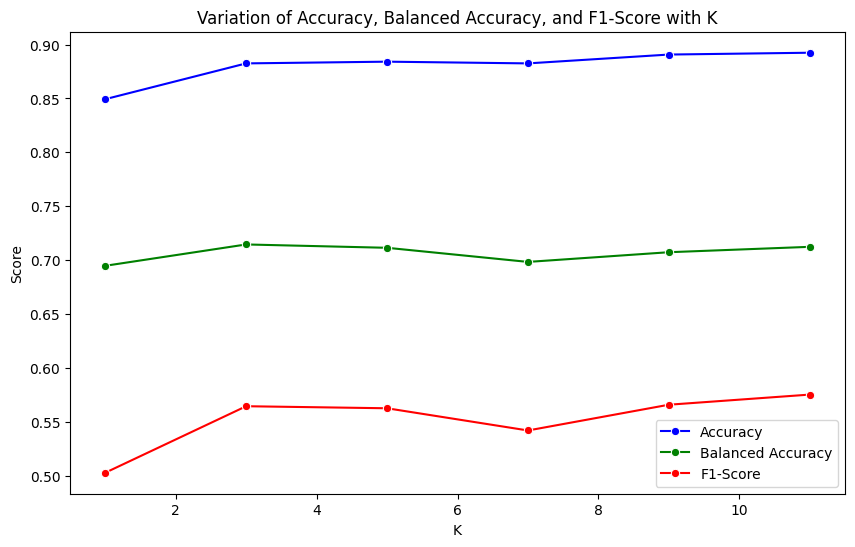

In [54]:
#From above results
K_values = [1, 3, 5, 7, 9, 11]
accuracy = [0.8493, 0.8825, 0.8841, 0.8825, 0.8907, 0.8924]
balanced_accuracy = [0.6947, 0.7145, 0.7114, 0.6983, 0.7073, 0.7123]
f1_score = [0.5027, 0.5644, 0.5625, 0.5419, 0.5658, 0.5752]

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each metric
sns.lineplot(x=K_values, y=accuracy, marker='o', label='Accuracy', color='blue')
sns.lineplot(x=K_values, y=balanced_accuracy, marker='o', label='Balanced Accuracy', color='green')
sns.lineplot(x=K_values, y=f1_score, marker='o', label='F1-Score', color='red')

# Add title and labels
plt.title('Variation of Accuracy, Balanced Accuracy, and F1-Score with K')
plt.xlabel('K')
plt.ylabel('Score')

**From the above KNN Classification hyperparameter tuning we have:**
- K* = 11
- K** = 3
- K+ = 11

Now we calculate the test set performance for K=[3,11]

In [53]:
# Test set performance

k_values = [3,11]

for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_test, k, categorical_cols, continuous_cols)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test) #(true_positive+true_negative)/Total

    # Calculate confusion matrix components
    true_positive = np.sum((y_pred == 1) & (y_test == 1))
    true_negative = np.sum((y_pred == 0) & (y_test == 0))
    false_positive = np.sum((y_pred == 1) & (y_test == 0))
    false_negative = np.sum((y_pred == 0) & (y_test == 1))

    # Balanced Accuracy (BAcc)
    sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
    bacc = (sensitivity + specificity) / 2

    # F1 Score
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"K = {k}: Accuracy = {accuracy:.4f}, Balanced Accuracy = {bacc:.4f}, F1-score = {f1:.4f}")

K = 3: Accuracy = 0.8673, Balanced Accuracy = 0.6781, F1-score = 0.5000
K = 11: Accuracy = 0.8823, Balanced Accuracy = 0.6910, F1-score = 0.5359


#Solution(e)

- From the above plotted bar graphs we can see that the dataset is dominant toward the White Race and doesn't cover much of the Black and Other Race. This might add training bias to the classification algorithm and hence we need more uniform dataset before deploying this model to CU Anschutz because of fair dominance of Hispanic/Latino Women in both regions.
- Similar thing can be told about 'Married' status as well.
- Also extreme cases of breast cancer are not prominent in the dataset which might also lead to false classification.

#Solution(f)

We have K+ = 11




In [67]:
# No need of validation/dev set
train_df = df.sample(frac=0.7, random_state=30) #70%
test_df = df.drop(train_df.index) #30%

In [68]:
X_train, y_train = separate_features_labels(train_df)
X_test, y_test = separate_features_labels(test_df)

In [69]:
categorical_cols = [i for i, col in enumerate(X_train.columns) if col in categorical]
continuous_cols = [i for i, col in enumerate(X_train.columns) if col not in categorical]

best_k_f1 = 11

y_pred = knn_classifier(X_train, y_train, X_test, best_k_f1, categorical_cols, continuous_cols)

# Unique Races
races = df['Race'].unique()

f1_scores = {}

# Function to calculate precision, recall, and F1
def calculate_f1(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0
    return f1

# Loop through each race and calculate TP, FP, FN for each
for race in races:
    TP = 0
    FP = 0
    FN = 0

    # Iterate through the data and compute TP, FP, and FN for the current race
    for true, pred, r in zip(y_test, y_pred, X_test['Race']):
        if r == race:
            if true == 1 and pred == 1:
                TP += 1
            elif true == 0 and pred == 1:
                FP += 1
            elif true == 1 and pred == 0:
                FN += 1

    # Calculate F1 score for the current race
    f1_scores[race] = calculate_f1(TP, FP, FN)

#Prnt results
for race, f1 in f1_scores.items():
    print(f"F1-score for {race}: {f1:.4f}")


F1-score for White: 0.5481
F1-score for Black: 0.6923
F1-score for Other: 0.4000
